In [1]:
import pandas as pd
import numpy
import select_file
import clean_data
import result
import diagramme_camembert

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/Users/lukapavageau/Library/Mobile Documents/com~apple~CloudDocs/QIF 4A/semestre 8/projetEntreprise/python/DEVILLE-Dashboard/python/backend/result.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] == row[1]:
/Users/lukapavageau/Library/Mobile Documents/com~apple~CloudDocs/QIF 4A/semestre 8/projetEntreprise/python/DEVILLE-Dashboard/python/backend/result.py:59: FutureWarning: Se

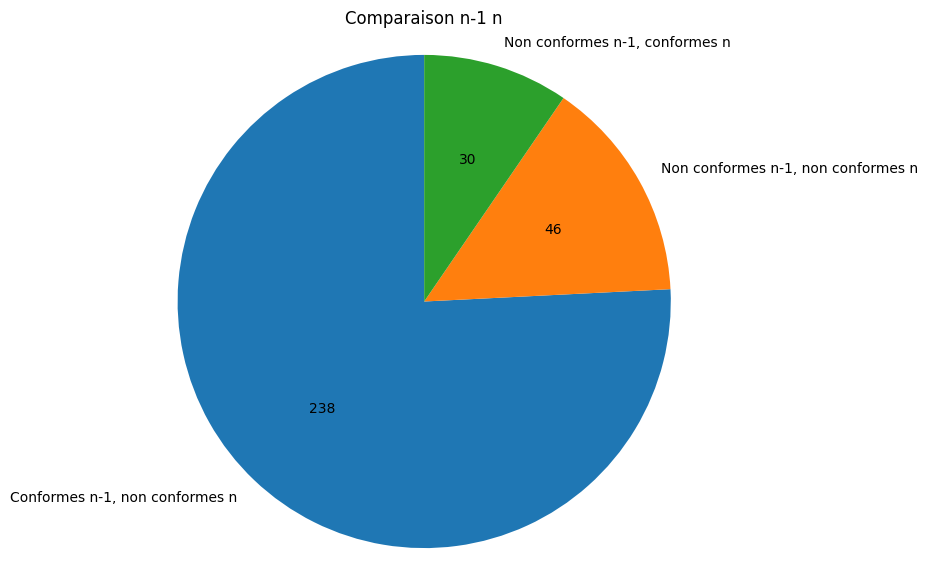

,N° Cote,Valeur nominale,Limite Inf,Limite Sup,Measure tool,Empreinte,Mesure1,Mesure2,Mesure3,Mesure4,Mesure5,Index,Empreinte,Mesure1,Mesure2,Mesure3,Mesure4,Mesure5,Index
4,102.0,3.10,0.00,0.25,0.0,1.0,3.333000,0.000000,0.000000,0.000000,0.000000,14.0,1.0,3.350000,0.000000,0.000000,0.000000,0.000000,22.0
5,0.0,0.00,0.00,0.00,0.0,2.0,3.203000,3.197000,0.000000,0.000000,0.000000,16.0,2.0,3.136000,0.000000,0.000000,0.000000,0.000000,22.0
44,107.0,1.60,-1.60,0.00,0.0,1.0,1.316000,1.254000,1.410000,1.255000,1.130000,13.0,1.0,1.712000,2.096000,2.044000,1.524000,2.102000,19.0
45,1.0,0.00,0.00,0.00,0.0,2.0,1.262000,1.373000,1.281000,1.248000,1.365000,16.0,2.0,1.773000,1.469000,1.816000,1.670000,1.618000,19.0
46,107.0,1.60,-1.60,0.00,0.0,1.0,1.570000,1.593000,1.594000,1.568000,1.583000,13.0,1.0,1.530000,1.918000,1.717000,1.675000,1.501000,19.0
47,2.0,0.00,0.00,0.00,0.0,2.0,0.804000,0.920000,0.853000,0.771000,0.900000,16.0,2.0,2.325000,2.623000,2.473000,2.510000,2.491000,19.0
60,109.0,3.10,0.00,0.20,0.0,1.0,3.150000,3.150000,3.140000,3.150000,3.150000,13.0,1.0,3.098000,0.000000,0.000000,0.000000,0.000000,22.0
61,0.0,0.00,0.00,0.00,0.0,2.0,3.153000,3.159000,0.000000,0.000000,0.000000,16.0,2.0,3.157000,0.000000,0.000000,0.000000,0.000000,22.0
186,218.0,0.15,-0.15,0.00,0.0,1.0,0.049013,0.046530,0.024149,0.048137,0.040260,13.0,1.0,0.037212,0.040295,0.034722,0.036504,0.042379,22.0
187,0.0,0.00,0.00,0.00,0.0,2.0,0.134773,0.138023,0.125762,0.136626,0.130633,16.0,2.0,0.172310,0.176291,0.176996,0.167206,0.171930,22.0


In [5]:
paths = ["./fot10_copie.xlsx","./fot12_copie.xlsx"]

liste_df = select_file.select_file(paths)
liste_dc = clean_data.clean_data(liste_df)
liste_ds = result.filter_conformity(liste_dc)






liste_variables = result.compare_reports(liste_ds)
diagramme_camembert.afficher_diagramme(liste_variables[0])


df = result.compare_deep(liste_dc,liste_variables[3]) # liste_indices_cas[1] : cas 1. Cette valeur sera attribuée par le frontend
df